In [3]:
import pandas as pd
pd.options.display.max_columns = None
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
movies=pd.read_csv("movie_metadata.csv")
movies.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000


In [8]:
movies[movies['movie_title'].str.contains('Hitcher')]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes


In [158]:
movies=movies[['gross','genres','language','country','budget','content_rating','title_year']]

In [159]:
movies=movies[movies['title_year']>1995]
movies=movies[movies['title_year']<2016]
movies=movies[movies['country']=='USA']

In [160]:
movies.head(1)

,gross,genres,language,country,budget,content_rating,title_year
0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,English,USA,237000000.0,PG-13,2009.0


C:\Users\minim\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: pandas.core.common.is_list_like is deprecated. import from the public API: pandas.api.types.is_list_like instead
  app.launch_new_instance()


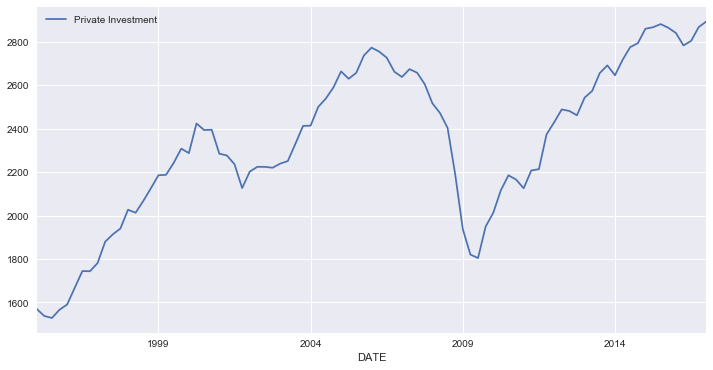

In [161]:
from pandas_datareader import fred

gdp = fred.FredReader(['GPDIC96'], start='1995-01-01').read().rename(columns={
                    "GPDIC96": "Private Investment"})
gdp.plot(figsize=(12, 6))

In [162]:
import datetime
movies['title_year']=movies['title_year'].apply(lambda x: datetime.datetime.strptime(str(x).split(".")[0],"%Y"))

In [163]:
movies['count']=1

In [164]:
import numpy as np

In [182]:
comb=gdp.resample("As",how="sum").reset_index().merge(pd.DataFrame(movies.groupby("title_year").agg(np.sum)).reset_index(),left_on="DATE",right_on="title_year")

C:\Users\minim\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


In [183]:
comb

,DATE,Private Investment,title_year,gross,budget,count
0,1996-01-01,6746.738,1996-01-01,3.885196e+09,2.923620e+09,86
1,1997-01-01,7515.895,1997-01-01,4.772853e+09,3.532775e+09,94
2,1998-01-01,8233.326,1998-01-01,4.489484e+09,3.537920e+09,100
3,1999-01-01,8925.490,1999-01-01,5.585373e+09,4.180512e+09,132
4,2000-01-01,9502.083,2000-01-01,6.214243e+09,5.041467e+09,136
5,2001-01-01,8925.790,2001-01-01,6.920250e+09,5.150040e+09,149
6,2002-01-01,8872.957,2002-01-01,7.544467e+09,5.305099e+09,157
7,2003-01-01,9234.788,2003-01-01,7.107731e+09,5.092503e+09,135
8,2004-01-01,10045.387,2004-01-01,7.349406e+09,5.882743e+09,156
9,2005-01-01,10690.367,2005-01-01,6.306235e+09,5.147688e+09,154


In [184]:
del comb['title_year']
comb=comb.rename(columns={"DATE": "Year",0:"Movies Released"})
comb=comb.set_index("Year")

In [185]:
def scale_df(df):
    df=df.copy()
    for col in df.columns:
        df[col]=df[col]/df[col].iloc[0]
    return df
comb=scale_df(comb)

In [186]:
str(comb.index.tolist()[0])

'1996-01-01 00:00:00'

In [222]:
comb.index=[int(str(x).split("-")[0]) for x in comb.index.tolist()]

range(1996, 2015)

In [227]:
import matplotlib

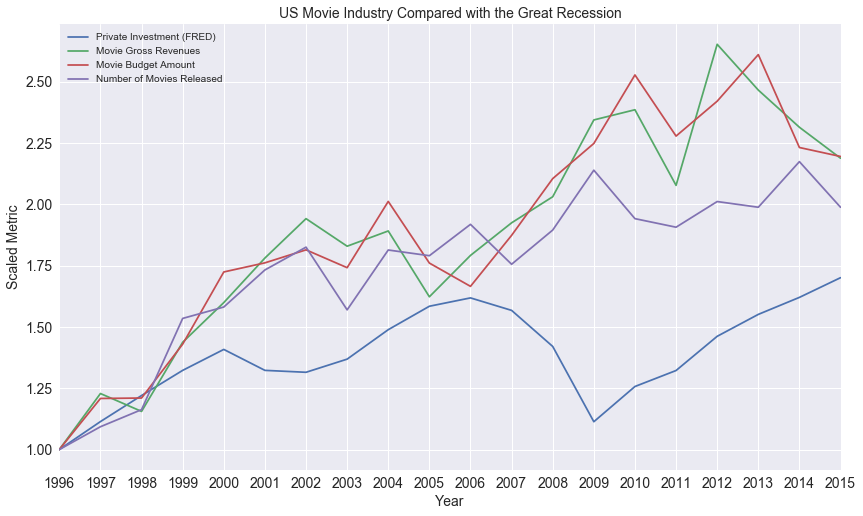

In [239]:
ax=comb.rename(columns={"gross": "Movie Gross Revenues", "Private Investment": "Private Investment (FRED)", "budget": "Movie Budget Amount", "count": "Number of Movies Released"}).plot(figsize=(14, 8.2))
plt.title("US Movie Industry Compared with the Great Recession")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
ax.set_xticks(range(min(comb.index),max(comb.index)+1))
ax.set_xticklabels(comb.index)
plt.xlabel("Year")
plt.ylabel("Scaled Metric")
plt.show()

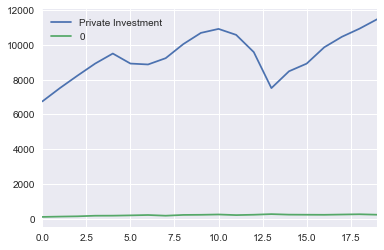

In [87]:
comb[['DATE','Private Investment',0]].plot()